# ПРОЕКТ 1

# Библиотеки 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
import scipy.optimize as opt

# Данные 

Загружаем данные:

Валовый региональный продукт за 2018 год (Будет обозначаться переменной Y_VRP)

Уровень безработицы за 2018 год (Будет обозначаться переменной X_UB)

Число занятых за 2018 год (Будет обозначаться переменной X_Zan) 

Степень износов фондов за 2018 год (Будет обозначаться переменной X_SIF)

In [38]:
Data = pd.ExcelFile("Данные о ВРП и Числ Занят.xlsx").parse()
Data=Data[4:]
Data

,Unnamed: 0,Обновлено 25.11.2019,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
4,NaN,NaN,СИФ,УБ,ЧисЗан,ВРП,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Периодичность,Срок (согласно Федеральному плану статистическ...,Исполнитель
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,Белгородская область,44.5,4,791.394,559184,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,Брянская область,48.6,3.9,569.588,272742,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Годовая,октябрь,Н.А. Лычагина (495) 607-27-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,NaN,Амурская область,43.8,5.6,388.747,378319,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,Магаданская область,39.9,5.1,83.76,1.19669e+06,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,NaN,Сахалинская область,55,5.3,259.433,2.40793e+06,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,Еврейская автономная область,38.2,7,72.024,346716,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
Data.columns

Index(['Unnamed: 0', 'Обновлено 25.11.2019', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23'],
      dtype='object')

In [43]:
Y_VRP = Data['Unnamed: 5']
Y_VRP=Y_VRP[1:].dropna()
Y_VRP=Y_VRP/1000000
Y_VRP

7      0.559184
8      0.272742
9      0.321079
10     0.404838
11     0.195995
         ...   
96     0.378319
97      1.19669
98      2.40793
99     0.346716
100      1.5785
Name: Unnamed: 5, Length: 87, dtype: object

In [45]:
X_SIF=Data['Unnamed: 2']
X_SIF=X_SIF[1:].dropna()
X_SIF=X_SIF/100
X_SIF

7      0.445
8      0.486
9      0.451
10     0.403
11     0.526
       ...  
96     0.438
97     0.399
98      0.55
99     0.382
100    0.493
Name: Unnamed: 2, Length: 87, dtype: object

In [46]:
X_UB=Data['Unnamed: 3']
X_UB=X_UB[1:].dropna()
X_UB=X_UB/100
X_UB

7       0.04
8      0.039
9      0.047
10     0.037
11     0.042
       ...  
96     0.056
97     0.051
98     0.053
99      0.07
100    0.031
Name: Unnamed: 3, Length: 87, dtype: object

In [52]:
X_Zan = Data['Unnamed: 4']
X_Zan=X_Zan[1:].dropna()
X_Zan=X_Zan/10000
X_Zan

7      0.0791394
8      0.0569588
9      0.0688532
10      0.112319
11      0.049554
         ...    
96     0.0388747
97      0.008376
98     0.0259433
99     0.0072024
100    0.0029439
Name: Unnamed: 4, Length: 87, dtype: object

Проверим совпадают ли индексы, для того чтобы узнать, что значения соотносятся правильно между переменными 

In [70]:
Ravn_Index_1 = list(map(lambda x: X_Zan.index[x] == X_UB.index[x],range(len(X_Zan))))
sum(Ravn_Index_1)==len(X_Zan)

True

In [68]:
Ravn_Index_2 = list(map(lambda x: X_Zan.index[x] == X_SIF.index[x],range(len(X_Zan))))
sum(Ravn_Index_2)==len(X_Zan)

True

In [69]:
Ravn_Index_3 = list(map(lambda x: X_Zan.index[x] == Y_VRP.index[x],range(len(X_Zan))))
sum(Ravn_Index_3)==len(X_Zan)

True

Видно, что все индексы совпали

# Таблица

In [73]:
Table = pd.concat([X_Zan, X_UB, X_SIF, Y_VRP], axis=1)
Table.columns = (['Занятость', 'Уровень безработицы', 'Степень износа фондов', 'ВРП'])
Table

,Занятость,Уровень безработицы,Степень износа фондов,ВРП
7,0.0791394,0.04,0.445,0.559184
8,0.0569588,0.039,0.486,0.272742
9,0.0688532,0.047,0.451,0.321079
10,0.112319,0.037,0.403,0.404838
11,0.049554,0.042,0.526,0.195995
...,...,...,...,...
96,0.0388747,0.056,0.438,0.378319
97,0.008376,0.051,0.399,1.19669
98,0.0259433,0.053,0.55,2.40793
99,0.0072024,0.07,0.382,0.346716


# Графики

Построим диаграммы рассеяния, для того чтобы визуально понять зависимость переменных

In [74]:
def Diag_Ras(a,b):
    plt.plot( Table[Itog_Table.columns[a]], Table[Itog_Table.columns[b]], 'o')
    plt.ylabel( Table.columns[b])
    plt.xlabel( Table.columns[a])
    return print('Коэффициент корреляции составляет -', 
Table[Table.columns[b]].astype(float).corr(Table[Table.columns[a]].astype(float)))

Коэффициент корреляции составляет - 0.004060906338074544


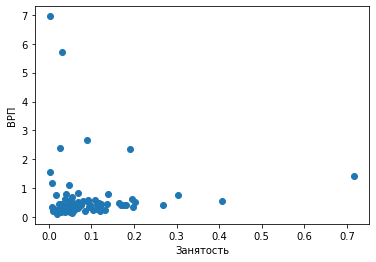

In [75]:
Diag_Ras(0,3)

Коэффициент корреляции составляет - -0.16902688549247388


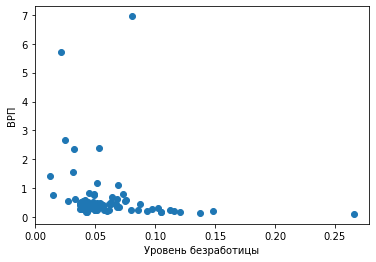

In [76]:
Diag_Ras(1,3)

Коэффициент корреляции составляет - 0.17237658439872788


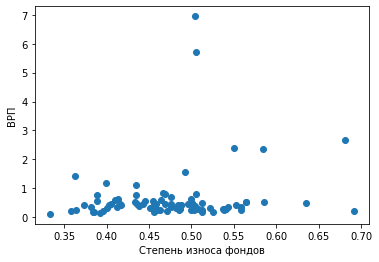

In [77]:
Diag_Ras(2,3)

# Обучение МОДЕЛИ МНК 

In [ ]:
Y_VRP = Table['ВРП'].values.reshape(len(Table['ВРП']), 1)
X_ONES= np.ones((Y_VRP.shape[0],1)).astype(float)
X_SIF = Table['Степень износа фондов'].values.reshape( Y_VRP.shape[0], 1).astype(float)
X_Zan = Table['Занятость'].values.reshape( Y_VRP.shape[0], 1).astype(float)
X_UB = Itog_Table['Уровень безработицы'].values.reshape( Y_VRP.shape[0], 1).astype(float)

In [123]:
def MODEL_MNK(a,b,c,k,p):
    sum1 = 0.
    sum2 = 0.
    Matrix = np.concatenate([X_ONES, X_SIF**a, X_Zan**b, X_UB**c], axis=1)
    Matrix = Matrix.astype(float)
    Matrix_obr = np.linalg.pinv( Matrix )
    Koef = Matrix_obr.dot( Y_VRP )
    Koef = Koef.reshape( Koef.shape[0] )
    print("*"*60)
    print('Коэффициент перед переменной X_ONES  =' , Koef[0])
    print('Коэффициент перед переменной X_SIF   =' , Koef[1])
    print('Коэффициент перед переменной X_Zan   =' , Koef[2])
    print('Коэффициент перед переменной X_UB    =' , Koef[3])
    print("*"*60)
    for i in range(Y_VRP.shape[0]):
        err11 = (Koef[0]+Koef[1]*((X_SIF)**a)[i]+Koef[2]*((X_Zan)**b)[i]+Koef[3]*((X_UB)**c)[i])
        err = (Koef[0]+Koef[1]*((X_SIF)**a)[i]+Koef[2]*((X_Zan)**b)[i]+Koef[3]*((X_UB)**c)[i])-Y_VRP[i]
        sum1 += err
        sum2 += err * err
    print( "Ошибка                          =", sum1[0])
    print( "Средний квадрат ошибки          =", sum2[0]/Y.shape[0])
    erorLIN = []
    erorSQR = []
    erorLIN1 = []
    erorSQR1 = []
    for j in range(k):
        perm = np.random.permutation( Y_VRP.shape[0] )
        ii = perm[:int(Y_VRP.shape[0] * p)]
        jj = perm[int(Y_VRP.shape[0]*p):]
        Matrix_1 = np.concatenate([X_ONES[ii], (X_SIF**a)[ii], (X_Zan**b)[ii], (X_UB**c)[ii]], axis=1)
        Matrix_1 = Matrix_1.astype(float)
        Matrix_obr_1 = np.linalg.pinv( Matrix_1 )
        Koef_1 = Matrix_obr_1.dot( Y_VRP[ii] )
        Koef_1 = Koef_1.reshape( Koef_1.shape[0] )
        err1 = list(map (lambda x: ((((Koef_1[0]+Koef_1[1]*((X_SIF)**a)[ii][x]+Koef_1[2]*((X_Zan)**b)[ii][x]+
                Koef_1[3]*((X_UB)**c)[ii][x])-Y_VRP[ii][x]))), (range(Y_VRP[ii].shape[0]))))
        g=sum(err1)/Y[ii].shape[0]
        gg=sum(list(map(lambda x: x**2, err1)))/Y[ii].shape[0]
        erorLIN.append(g[0])
        erorSQR.append(gg[0])
        err2 = list(map (lambda x: ((((Koef_1[0]+Koef_1[1]*((X_SIF)**a)[jj][x]+Koef_1[2]*((X_Zan)**b)[jj][x]+
                Koef_1[3]*((X_UB)**c)[jj][x])-Y_VRP[jj][x]))), (range(Y_VRP[jj].shape[0]))))
        ggg=sum(err2)/Y_VRP[jj].shape[0]
        gggg=sum(list(map(lambda x: x**2, err2)))/Y_VRP[jj].shape[0]
        erorLIN1.append(ggg[0])
        erorSQR1.append(gggg[0]) 
    print("*************************МНК********************************")
    print("*"*60)
    print ("ОБУЧАЮЩИЕ ДАННЫЕ")
    print ("Ошибка                          =", sum(erorLIN)/k)
    print ("Средний квадрат ошибки          =", sum(erorSQR)/k)
    print("*"*60)
    print ("ТЕСТОВЫЕ ДАННЫЕ")
    print ("Ошибка                          =", sum(erorLIN1)/k)
    print ("Средний квадрат ошибки          =", sum(erorSQR1)/k)
    print("*"*60)

МНК - модель 1 

In [124]:
MODEL_MNK(1,1,1,1000,0.75)

************************************************************
Коэффициент перед переменной X_ONES  = 0.044307768487600374
Коэффициент перед переменной X_SIF   = 1.7949780442106844
Коэффициент перед переменной X_Zan   = -0.20238605345946337
Коэффициент перед переменной X_UB    = -3.8955729496728293
************************************************************
Ошибка                          = -2.55351295663786e-14
Средний квадрат ошибки          = 0.8342794773814804
*************************МНК********************************
************************************************************
ОБУЧАЮЩИЕ ДАННЫЕ
Ошибка                          = -1.0791794808212139e-17
Средний квадрат ошибки          = 0.9041147376852523
************************************************************
ТЕСТОВЫЕ ДАННЫЕ
Ошибка                          = -0.03307894550839703
Средний квадрат ошибки          = 1.0946571468597546
************************************************************


МНК - модель 2

In [125]:
MODEL_MNK(2,2,2,1000,0.75)

************************************************************
Коэффициент перед переменной X_ONES  = 0.04802403782010138
Коэффициент перед переменной X_SIF   = 2.6028549328123476
Коэффициент перед переменной X_Zan   = 1.6983515136307394
Коэффициент перед переменной X_UB    = -6.121456270552293
************************************************************
Ошибка                          = 4.75175454539567e-14
Средний квадрат ошибки          = 0.8344124618761235
*************************МНК********************************
************************************************************
ОБУЧАЮЩИЕ ДАННЫЕ
Ошибка                          = 1.8845181825300782e-17
Средний квадрат ошибки          = 0.9226909296882475
************************************************************
ТЕСТОВЫЕ ДАННЫЕ
Ошибка                          = -0.0211117910157303
Средний квадрат ошибки          = 1.0378046018525386
************************************************************


МНК - модель 3

In [126]:
MODEL_MNK(3,3,3,1000,0.75)

************************************************************
Коэффициент перед переменной X_ONES  = 0.25203818559881375
Коэффициент перед переменной X_SIF   = 3.4097724108253256
Коэффициент перед переменной X_Zan   = 2.706591209666368
Коэффициент перед переменной X_UB    = -20.63782815769025
************************************************************
Ошибка                          = -5.229150445984487e-14
Средний квадрат ошибки          = 0.8346553047388194
*************************МНК********************************
************************************************************
ОБУЧАЮЩИЕ ДАННЫЕ
Ошибка                          = 4.05105393674887e-15
Средний квадрат ошибки          = 0.9350367515702879
************************************************************
ТЕСТОВЫЕ ДАННЫЕ
Ошибка                          = -0.019880695306919587
Средний квадрат ошибки          = 1.056551620229778
************************************************************


МНК - модель 4

In [127]:
MODEL_MNK(1,2,3,1000,0.75)

************************************************************
Коэффициент перед переменной X_ONES  = -0.7061396343756731
Коэффициент перед переменной X_SIF   = 2.7930950804746866
Коэффициент перед переменной X_Zan   = 1.9045754705570204
Коэффициент перед переменной X_UB    = -10.869168620428871
************************************************************
Ошибка                          = 4.440892098500626e-14
Средний квадрат ошибки          = 0.8349631847397976
*************************МНК********************************
************************************************************
ОБУЧАЮЩИЕ ДАННЫЕ
Ошибка                          = 3.118509723958159e-17
Средний квадрат ошибки          = 0.9029214697201721
************************************************************
ТЕСТОВЫЕ ДАННЫЕ
Ошибка                          = -0.03960189276250035
Средний квадрат ошибки          = 1.1225137360772781
************************************************************


МНК - модель 5

In [128]:
MODEL_MNK(3,2,1,1000,0.75)

************************************************************
Коэффициент перед переменной X_ONES  = 0.4884315389634739
Коэффициент перед переменной X_SIF   = 2.8976402557421514
Коэффициент перед переменной X_Zan   = 1.2041872527084208
Коэффициент перед переменной X_UB    = -3.205157789208847
************************************************************
Ошибка                          = -1.0547118733938987e-14
Средний квадрат ошибки          = 0.8292359491568586
*************************МНК********************************
************************************************************
ОБУЧАЮЩИЕ ДАННЫЕ
Ошибка                          = -1.2037768218129051e-15
Средний квадрат ошибки          = 0.910225130978516
************************************************************
ТЕСТОВЫЕ ДАННЫЕ
Ошибка                          = -0.02502358548795473
Средний квадрат ошибки          = 1.0628435368798852
************************************************************


ВЫВОД

НАИЛУЧШАЯ МОДЕЛь МНК - модель 2

# Обучение МОДЕЛИ С ОШИБКОЙ

In [201]:
class MODEL_ERROR:
    def __init__(self, a=1, b=1, c=1, d=1, e=1, k=100, p=0.75):
        self.sum1 = 0.
        self.sum2 = 0.
        self.erorSQR = 0.
    def ERROR(self,a,b,c,d,e,k,p):
        self.a=a
        self.b=b
        self.c=c
        self.d=d
        self.e=e
        for j in range(k):
            perm = np.random.permutation( Y_VRP.shape[0] )
            self.ii = perm[:int(Y_VRP.shape[0] * p)]
            self.jj = perm[int(Y_VRP.shape[0]*p):]
            z=opt.minimize( self.Min_error, (0,0,0,0), method = 'CG' )
            self.sum2 = 0.
            for i in range(self.jj.shape[0]):
                err = ((z.x[0]+z.x[1]*((X_SIF.astype(float))**self.a)[self.jj][i]+z.x[2]*((X_Zan.astype(float))**self.b)[self.jj][i]+z.x[3]*((X_UB.astype(float))**self.c)[self.ii][i])-(Y_VRP.astype(float))[self.jj][i])
                self.sum2+= (int(err[0]<0)*err[0])**self.d+(int(err[0]>=0)*err[0])**self.e
            g=self.sum2/Y_VRP[self.jj].shape[0]
            self.erorSQR+=g
        print("******************МОДЕЛИ С ОШИБКОЙ**************************")
        print("*"*60)
        print ("ТЕСТОВЫЕ ДАННЫЕ")
        print ("Ошибка                          =", self.erorSQR/k)
        print("*"*60)
    def Min_error(self,Koeff ):
        for i in range(self.ii.shape[0]):
            self.err = ((Koeff[0]+Koeff[1]*((X_SIF.astype(float))**self.a)[self.ii][i]+Koeff[2]*((X_Zan.astype(float))**self.b)[self.ii][i]+Koeff[3]*((X_UB.astype(float))**self.c)[self.ii][i])-(Y_VRP.astype(float))[self.ii][i])
            self.sum1+= (int(self.err<0)*self.err)**self.d +(int(self.err>=0)*self.err)**self.e
        return (self.sum1/self.ii.shape[0])

МОДЕЛИ С ОШИБКОЙ - модель 1

In [300]:
Model_1=MODEL_ERROR()
Model_1.ERROR(1,1,1,1,1, 10, 0.75)

******************ФУНКЦИЯ МИНИМУМА**************************
************************************************************
ТЕСТОВЫЕ ДАННЫЕ
Ошибка                          = -0.6059987931818182
************************************************************


МОДЕЛИ С ОШИБКОЙ - модель 2

In [203]:
Model_1.ERROR(1,1,1,2,2, 10, 0.75)

******************ФУНКЦИЯ МИНИМУМА**************************
************************************************************
ТЕСТОВЫЕ ДАННЫЕ
Ошибка                          = 0.9034777936707238
************************************************************


МОДЕЛИ С ОШИБКОЙ - модель 3

In [204]:
Model_1.ERROR(3,2,1,2,2, 10, 0.75)

******************ФУНКЦИЯ МИНИМУМА**************************
************************************************************
ТЕСТОВЫЕ ДАННЫЕ
Ошибка                          = 2.468985718344994
************************************************************


МОДЕЛИ С ОШИБКОЙ - модель 4

In [205]:
Model_1.ERROR(1,2,3,3,1, 10, 0.75)

******************ФУНКЦИЯ МИНИМУМА**************************
************************************************************
ТЕСТОВЫЕ ДАННЫЕ
Ошибка                          = -6.666598374043637
************************************************************


МОДЕЛИ С ОШИБКОЙ - модель 5

In [206]:
Model_1.ERROR(2,2,3,1,1, 10, 0.75)

******************ФУНКЦИЯ МИНИМУМА**************************
************************************************************
ТЕСТОВЫЕ ДАННЫЕ
Ошибка                          = -7.207333512225456
************************************************************


ВЫВОД

НАИЛУЧШАЯ МОДЕЛь С ОШИБКОЙ - модель 1

# Обучение МОДЕЛИ С РЕГУЛЯРИЗАЦИЕЙ 

In [292]:
class MODEL_REGULARIS:
    def __init__(self, a=1, b=1, c=1, L1=0, L2=0, k=100, p=0.75):
        self.sum1 = 0.
        self.sum2 = 0.
        self.erorSQR = []
    def ERROR_REGULARIS(self,a,b,c,L1,L2,k,p):
        self.a=a
        self.b=b
        self.c=c
        self.L1=L1
        self.L2=L2
        for j in range(k):
            perm = np.random.permutation( Y_VRP.shape[0] )
            self.ii = perm[:int(Y_VRP.shape[0] * p)]
            self.jj = perm[int(Y_VRP.shape[0]*p):]
            z=opt.minimize( self.MIN_REGULARIS, (0,0,0,0), method = 'CG' )
            err = list(map(lambda x:(z.x[0]+z.x[1]*((X_SIF.astype(float))**self.a)[self.jj][x]
            +z.x[2]*((X_Zan.astype(float))**self.b)[self.jj][x]
            +z.x[3]*((X_UB.astype(float))**self.c)[self.jj][x]-(((Y_VRP.astype(float))[self.jj][x])**2))
            +self.L1*((np.abs(z.x[1])+np.abs(z.x[2])+np.abs(z.x[3])))
            +self.L2*(((z.x[1])**2+(z.x[2])**2+(z.x[3])**2)), range(self.jj.shape[0])))
            g=sum(err)/Y_VRP[self.jj].shape[0]
            self.erorSQR.append(g[0])
            
        print("******************МОДЕЛИ С РЕГУЛЯРИЗАЦИЕЙ**********************")
        print ("ТЕСТОВЫЕ ДАННЫЕ")
        print ("Ошибка                          =", sum(self.erorSQR)/k)
        print("*"*60)
        
    def MIN_REGULARIS(self,Koeff ):
        self.err = list(map(lambda x:(Koeff[0]+Koeff[1]*((X_SIF.astype(float))**self.a)[self.ii][x]
        +Koeff[2]*((X_Zan.astype(float))**self.b)[self.ii][x]
        +Koeff[3]*((X_UB.astype(float))**self.c)[self.ii][x]-(((Y_VRP.astype(float))[self.ii][x])**2))
        +self.L1*((np.abs(Koeff[1])+np.abs(Koeff[2])+np.abs(Koeff[3])))
        +self.L2*(((Koeff[1])**2+(Koeff[2])**2+(Koeff[3])**2)), range(self.ii.shape[0])))
        return np.mean(self.err)

МОДЕЛИ С РЕГУЛЯРИЗАЦИЕЙ - модель 1

In [293]:
Model_1=MODEL_REGULARIS()
Model_1.ERROR_REGULARIS(1,1,1,0,1, 100, 0.75)

******************МОДЕЛИ С РЕГУЛЯРИЗАЦИЕЙ**********************
ТЕСТОВЫЕ ДАННЫЕ
Ошибка                          = -289587181.14215314
************************************************************


МОДЕЛИ С РЕГУЛЯРИЗАЦИЕЙ - модель 2

In [296]:
Model_1.ERROR_REGULARIS(1,1,1,1,0, 10, 0.75)

******************МОДЕЛИ С РЕГУЛЯРИЗАЦИЕЙ**********************
ТЕСТОВЫЕ ДАННЫЕ
Ошибка                          = -2895871826.6026096
************************************************************


МОДЕЛИ С РЕГУЛЯРИЗАЦИЕЙ - модель 3

In [297]:
Model_1.ERROR_REGULARIS(1,1,1,10,0, 10, 0.75)

******************МОДЕЛИ С РЕГУЛЯРИЗАЦИЕЙ**********************
ТЕСТОВЫЕ ДАННЫЕ
Ошибка                          = -2895871828.0184846
************************************************************


МОДЕЛИ С РЕГУЛЯРИЗАЦИЕЙ - модель 4

In [298]:
Model_1.ERROR_REGULARIS(1,1,1,0,10, 10, 0.75)

******************МОДЕЛИ С РЕГУЛЯРИЗАЦИЕЙ**********************
ТЕСТОВЫЕ ДАННЫЕ
Ошибка                          = -3279217915.244919
************************************************************


МОДЕЛИ С РЕГУЛЯРИЗАЦИЕЙ - модель 5

In [299]:
Model_1.ERROR_REGULARIS(1,1,1,2,2, 10, 0.75)

******************МОДЕЛИ С РЕГУЛЯРИЗАЦИЕЙ**********************
ТЕСТОВЫЕ ДАННЫЕ
Ошибка                          = -3279217916.6282434
************************************************************


ВЫВОД

НАИЛУЧШАЯ МОДЕЛь С РЕГУЛЯРИЗАЦИЕЙ - модель 1